<a href="https://colab.research.google.com/github/shaina-12/Image-Steganography---Digital-Watermarking-to-Hide-Text-Messages---Networking-5th-Sem-Project/blob/main/ExperimentalCodes/%20KMeans_%2B_LSB_%2B_AES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import types
from google.colab.patches import cv2_imshow 
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#loading the image
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/Ladakh.png')
#changing the color of the image from bgr to rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#reshaping the image into a 2D array of pixels and 3 color values(RGB)
pixel_vals = image.reshape((-1,3))
#converts to float type only for supporting cv2.kmeans
pixel_vals = np.float32(pixel_vals) 

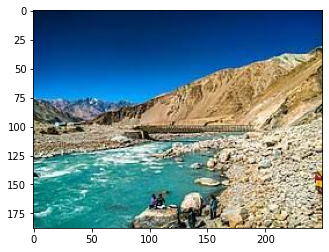

In [3]:
plt.imshow(image)

In [4]:
#carrying out the clustering process
#criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
#choosing the number of clusters
k=3
#performing kmeans clustering
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

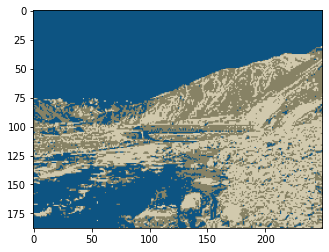

In [5]:
#convert data into 8 bit values
centers = np.uint8(centers)
#mapping labels to center points (RGB Value)
segmented_data = centers[labels.flatten()]
#reshape the data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)

In [6]:
from PIL import Image
clustered_image = Image.fromarray(segmented_image)
clustered_image.save('/content/drive/My Drive/Colab Notebooks/clustered_img.png')

In [7]:
retval

183342688.82546616

In [8]:
labels

array([[2],
       [2],
       [2],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [9]:
centers

array([[209, 201, 173],
       [135, 130, 101],
       [ 13,  84, 130]], dtype=uint8)

In [10]:
pixel_vals

array([[  0.,  25.,  60.],
       [  0.,  25.,  60.],
       [  0.,  25.,  60.],
       ...,
       [201., 191., 138.],
       [179., 169., 116.],
       [179., 170., 115.]], dtype=float32)

In [11]:
image_one_array = []
image_two_array = []
image_three_array = []
for i in range(0, len(labels)):
  if (labels[i][0] == 0):
    image_one_array.append(pixel_vals[i])
  elif (labels[i][0] == 1):
    image_two_array.append(pixel_vals[i])
  else:
    image_three_array.append(pixel_vals[i])
print(len(image_one_array),len(image_two_array),len(image_three_array))

11737 11994 23269


In [12]:
import math
len1 = len(image_one_array)
len2 = len(image_two_array)
len3 = len(image_three_array)
#padding of the image
pad1 = math.ceil(math.sqrt(len1))**2-len1
pad2 = math.ceil(math.sqrt(len2))**2-len2
pad3 = math.ceil(math.sqrt(len3))**2-len3
print(pad1, pad2, pad3)

144 106 140


In [13]:
white = np.array([255.0,255.0,255.0],dtype = np.float32)
for i in range(0,pad1):
  image_one_array.append(white)
for i in range(0,pad2):
  image_two_array.append(white)
for i in range(0,pad3):
  image_three_array.append(white)

In [14]:
d1 = int(math.sqrt(len(image_one_array)))
print(len(image_one_array), d1)
d2 = int(math.sqrt(len(image_two_array)))
print(len(image_two_array), d2)
d3 = int(math.sqrt(len(image_three_array)))
print(len(image_three_array), d3)

11881 109
12100 110
23409 153


In [15]:
#creation of three images according to the clusters
cluster1 = np.uint8(np.array(image_one_array)).reshape((d1, d1, 3))
cluster2 = np.uint8(np.array(image_two_array)).reshape((d2, d2, 3))
cluster3 = np.uint8(np.array(image_three_array)).reshape(d3, d3, 3)

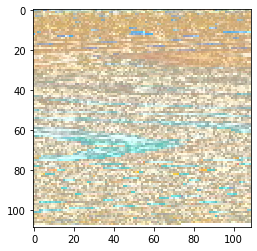

In [16]:
plt.imshow(cluster1)
cluster1_img = Image.fromarray(cluster1)
cluster1_img.save('/content/drive/My Drive/Colab Notebooks/cluster1_img.png')

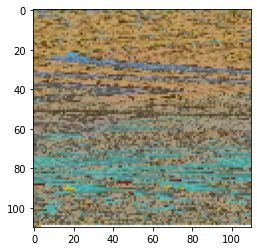

In [17]:
plt.imshow(cluster2)
cluster2_img = Image.fromarray(cluster2)
cluster2_img.save('/content/drive/My Drive/Colab Notebooks/cluster2_img.png')

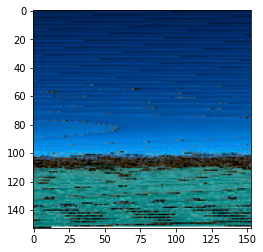

In [18]:
plt.imshow(cluster3)
cluster3_img = Image.fromarray(cluster3)
cluster3_img.save('/content/drive/My Drive/Colab Notebooks/cluster3_img.png')

In [19]:
# using LSB Algorithm
#to convert the different types into binary
def messageToBinary(message):
    if ( type (message) == str):
        return ''.join([ format(ord(i), "08b") for i in message ])
    elif ( type (message) == bytes): #or type(message) == np.ndarray:
        return ''.join([ format(i, "08b") for i in message ])
    elif ( type (message) == np.ndarray):
        return [format(i, "08b") for i in message]
    elif ( type (message) == int or type (message) == np.uint8):
        return format(message, "08b")
    else:
        raise TypeError("Input type not supported")
"""def messageToBinary(message):
  if (isinstance(message, str)):
    return ''.join([format(ord(i),'08b') for i in message])
  elif (isinstance(message, bytes) or isinstance(message, np.ndarray)):
    return [format(i,'08b') for i in message]
  elif (isinstance(message, int) or isinstance(message, np.uint8)):
    return format(message,'08b')
  else:
    raise TypeError('Input Type Not Supported')"""

"def messageToBinary(message):\n  if (isinstance(message, str)):\n    return ''.join([format(ord(i),'08b') for i in message])\n  elif (isinstance(message, bytes) or isinstance(message, np.ndarray)):\n    return [format(i,'08b') for i in message]\n  elif (isinstance(message, int) or isinstance(message, np.uint8)):\n    return format(message,'08b')\n  else:\n    raise TypeError('Input Type Not Supported')"

In [20]:
#to hide secret msg into image
def hideData(image,secret_message):
  #calculate the maximum bytes to encode
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  #print('Maximum bytes to encode:',n_bytes)
  #check if the number of bytes to encode is less than the maximum bytes in the image
  if (len(secret_message) > n_bytes):
    raise ValueError('Error encountered insufficient bytes, need bigger image or less data!!')
  secret_message += b'#####' #you can use any string as a delimeter
  data_index = 0
  #convert input data to binary format using messageToBinary()
  binary_secret_msg = messageToBinary(secret_message)
  print('binary',binary_secret_msg)
  data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
  #print(data_len)
  for values in image:
    for pixel in values:
      #convert rgb values to binary format
      r, g, b  = messageToBinary(pixel)
      #modify the lsb only if there is 
      if (data_index < data_len):
        #hide the data into lsb of red pixel
        pixel[0] = int (r[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      if (data_index < data_len):
        #hide the data into lsb of green pixel
        pixel[1] = int (g[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      if (data_index < data_len):
        #hide the data into lsb of blue pixel
        pixel[2] = int (b[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      #if data is encoded just break out of the loop
      if (data_index >= data_len):
        break
  #print(data_index)
  return image

In [21]:
def showData(image):
  binary_data = ''
  for values in image:
    for pixel in values:
      r, g, b = messageToBinary(pixel) #convert the red, green and blue values intpo binary format
      binary_data += r[-1] #extracting data from the lsb of red pixel
      binary_data += g[-1] #extraxting data from the lsb of green pixel
      binary_data += b[-1] #extracting data from the lsb of blue pixel
  #print(binary_data)
  #split by 8 bits
  all_bytes = [ binary_data[i: i+8] for i in range(0,len(binary_data),8)]
  print('all bytes')
  #convert from bits into characters
  decoded_data = b''
  for byte in all_bytes:
    try:
      decoded_data += int (byte,2).to_bytes (len(byte) // 8, byteorder='big')
      if (decoded_data[-5:] == b'#####'): #check if we have reached the delimeter which is '#####'
        break
    except Exception as e:
        print(byte)
        break
  print(decoded_data)
  return decoded_data[:-5] #remove the delimeter to show the original hidden message

In [22]:
#appling AES-128 algorithm for encrypting text before hiding it (AES stands for Advanced Encryption System)
!pip install pycrypto #-- inslallation of library having AES algorithm
from Crypto.Cipher import AES
#text hiding in image
key = b'Sixteen byte key'
msg = input('Enter the message: ')
#print(len(msg))
if (len(msg)%16 != 0):
  #a = len(msg)%16 != 0 
  #print(a)
  msg = msg + ' '*(16 - len(msg)%16)
print('Message:',msg,len(msg))
#encoding of messages
msg = msg.encode()
#applying of AES-128 algorithm for encryption
cipher = AES.new( key, AES.MODE_ECB)
enc_msg = cipher.encrypt(msg)
#printing of encrypted message
print('Encrypted message:',enc_msg)
#dividing the message into three chunks
#dividing the encrypted message into 3 parts
div_len = int(math.ceil(len(enc_msg)/3))
chunk1 = enc_msg[0:div_len]
chunk2 = enc_msg[div_len: 2*div_len]
chunk3 = enc_msg[2*div_len:]
print("chunk1:", chunk1)
print("chunk2:", chunk2)
print("chunk3:", chunk3)
#applying LSB to it for text hiding in clustered image
image1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster1_img.png')
image_encoded1 = hideData(image1, chunk1)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/cluster1_img_encoded.png', image_encoded1)
image2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster2_img.png')
image_encoded2 = hideData(image2, chunk2)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/cluster2_img_encoded.png', image_encoded2)
image3 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster3_img.png')
image_encoded3 = hideData(image3, chunk3)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/cluster3_img_encoded.png', image_encoded3)
#revealing the text from the image
#applying LSB to it for showing text in clustered image
image_dec1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster1_img_encoded.png')
decoded_chunk1 = showData(image_dec1)
print("decoded chunk1:",decoded_chunk1)
image_dec2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster2_img_encoded.png')
decoded_chunk2 = showData(image_dec2)
print("decoded chunk2:",decoded_chunk2)
image_dec3 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster3_img_encoded.png')
decoded_chunk3 = showData(image_dec3)
print("decoded chunk3:",decoded_chunk3)
#concatenating the shown message
decoded_encrypted_msg = decoded_chunk1 + decoded_chunk2 + decoded_chunk3
print("decoded encrypted message:", decoded_encrypted_msg)
#decrypting the message using AES - 128
dec_msg = cipher.decrypt(decoded_encrypted_msg)
print("Decrypted Message:", dec_msg)
#decoding the message and printing it
msg1 = dec_msg.decode()
print(msg1)

     |████████████████████████████████| 446 kB 33.4 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=88a9491e2442dc5ac302351aaf415ed3f143cbafa7cf728f7ee6f3d251ec3fc6
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto
Enter the message: shaina
Message: shaina           16
Encrypted message: b'\xc0\x13\\\xdd\xf3\r\xdc\x88\x1b\xe4IFP\x97HT'
chunk1: b'\xc0\x13\\\xdd\xf3\r'
chunk2: b'\xdc\x88\x1b\xe4IF'
chunk3: b'P\x97HT'
binary 1100000000010011010111001101110111110011000011010010001100100011001000110010001100100011
binary 1101110010001000000110111110010001001001010001100010001100100011001000110010001100100011
binary 010100001001011101001000010101000010001100100011001000110010001100100011
b'\xc0\x13\\\xdd\xf3\r#####'
decoded chunk1: b'\xc0\x13\\\xdd\xf3\r'
b'\xdc\x88\x1b\xe4IF#####'
decoded chunk2: b'\xdc\x88\x1b\xe4IF'
b'P\x97HT#####'
decoded chunk3:

In [ ]:
shaina mehta -- amity university